In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install pyEDM
import pyEDM as edm

In [2]:
'''
Binary prediction skill (“bloom” or “no bloom”) is
evaluated by how well bloom predictions above a defined threshold
correspond to bloom observations above the same threshold
Input: Series of observed chlorophyll-a, series of predicted chlorophyll-1
Output: Arrray containing [Accuracy, True Positive Rate, False Positive Rate, True Negative Rate, False Negative Rate]
'''
def thresh_bloom_binary_prediction(obs,pred,threshold=8.03199999999999):
    #obs_bloom_95 = np.percentile(obs, 95) #incorrect
    #pred_bloom_95 = np.percentile(pred, 95) #incorrect
    obs_blooms = obs > threshold
    pred_blooms = pred > threshold
    Accuracy = 1 - (obs_blooms ^ pred_blooms).mean()
    True_pos = (obs_blooms & pred_blooms).sum() / obs_blooms.sum()
    False_pos = ((~obs_blooms) & pred_blooms).sum() / (~obs_blooms).sum()
    True_neg = ((~obs_blooms) & (~pred_blooms)).sum() / (~obs_blooms).sum()
    False_neg = (obs_blooms & (~pred_blooms)).sum() / obs_blooms.sum()
    
    return [Accuracy, True_pos, False_pos, True_neg, False_neg]

In [3]:
'''
Binary prediction skill (“bloom” or “no bloom”) is
evaluated by how well bloom predictions (5% largest predicted values)
correspond to bloom observations (5%largest observed values)
Input: Series of observed chlorophyll-a, series of predicted chlorophyll-1
Output: Arrray containing [Accuracy, True Positive Rate, False Positive Rate, True Negative Rate, False Negative Rate]
'''
def bloom_binary_prediction(obs,pred):
    obs_bloom_95 = np.percentile(obs, 95) #incorrect
    pred_bloom_95 = np.percentile(pred, 95) #incorrect
    obs_blooms = obs > obs_bloom_95
    pred_blooms = pred > pred_bloom_95
    Accuracy = 1 - (obs_blooms ^ pred_blooms).mean()
    True_pos = (obs_blooms & pred_blooms).sum() / obs_blooms.sum()
    False_pos = ((~obs_blooms) & pred_blooms).sum() / (~obs_blooms).sum()
    True_neg = ((~obs_blooms) & (~pred_blooms)).sum() / (~obs_blooms).sum()
    False_neg = (obs_blooms & (~pred_blooms)).sum() / obs_blooms.sum()
    
    return [Accuracy, True_pos, False_pos, True_neg, False_neg]

In [4]:

paper_data = pd.read_csv('Data/cleaned_data.csv')
paper_data = paper_data.set_index('time (UTC)')
paper_data['Time'] = paper_data.index.astype(int)
paper_data['Avg_Chloro'] = paper_data['Avg_Chloro'].apply(np.log)
paper_data
#np.percentile(paper_data['Avg_Chloro'].dropna(), 95)

Avg_Chloro  Nitrate  Phosphate  Silicate  Nitrite  SURF_TEMP_C  \
time (UTC)                                                                   
0.0           0.598837     0.43       0.24       5.6     0.03         20.3   
7.0           0.996949     0.83       0.37       5.1     0.04         17.8   
13.0         -0.010050     0.45       0.24       3.5     0.00         22.2   
20.0          0.207014     0.34       0.17       4.2     0.00         19.8   
28.0          0.879627     0.29       0.12       3.8     0.00         22.5   
...                ...      ...        ...       ...      ...          ...   
5789.0        1.169381     0.85       0.30       6.2     0.00         17.4   
5796.0        1.220830     0.45       0.25       4.9     0.00         17.9   
5803.0        2.056685     0.00       0.17       5.2     0.00         18.3   
5811.0        2.850707     0.00       0.20       9.4     0.00         18.0   
5817.0        2.816007     0.00       0.10       7.5     0.00         18.4   

            BOT_TEMP_C  SURF_SAL_PSU  BOT_SAL_PSU  SURF_DENS_kgm3  \
time (UTC)                                                          
0.0               15.9         33.77        33.62     1023.638094   
7.0               16.9         33.66        33.62     1024.186379   
13.0              18.3         33.74        33.58     1023.100557   
20.0              19.4         33.68        33.62     1023.701088   
28.0              22.5         33.73        33.69     1023.009067   
...                ...           ...          ...             ...   
5789.0            17.4         33.48        33.46     1024.146195   
5796.0            17.9         33.48        33.47     1024.026335   
5803.0            16.4         33.54        33.55     1023.974093   
5811.0            17.4         33.64        33.61     1024.122823   
5817.0            17.2         33.63        33.62     1024.017322   

            BOT_DENS_kgm3  AVG_TEMP_C  AVG_SAL_PSU  AVG_DENS_kgm3  Time  
time (UTC)                                                               
0.0           1024.620655       18.10       33.695    1024.129374     0  
7.0           1024.391719       17.35       33.640    1024.289049     7  
13.0          1024.026040       20.25       33.660    1023.563298    13  
20.0          1023.780535        9.90       33.650    1023.740812    20  
28.0          1023.000725       11.25       33.710    1023.004896    28  
...                   ...         ...          ...            ...   ...  
5789.0        1024.152950       17.40       33.470    1024.149572  5789  
5796.0        1024.040616       17.90       33.475    1024.033476  5796  
5803.0        1024.454252       17.35       33.545    1024.214172  5803  
5811.0        1024.266323       17.70       33.625    1024.194573  5811  
5817.0        1024.321284       17.80       33.625    1024.169303  5817  

[832 rows x 15 columns]

In [5]:
time_series = paper_data[['Time', 'Nitrate', 'Phosphate', 'Silicate',  'Nitrite', 'AVG_TEMP_C', 'AVG_SAL_PSU', 'AVG_DENS_kgm3', 'Avg_Chloro']]
print(time_series)

            Time  Nitrate  Phosphate  Silicate  Nitrite  AVG_TEMP_C  \
time (UTC)                                                            
0.0            0     0.43       0.24       5.6     0.03       18.10   
7.0            7     0.83       0.37       5.1     0.04       17.35   
13.0          13     0.45       0.24       3.5     0.00       20.25   
20.0          20     0.34       0.17       4.2     0.00        9.90   
28.0          28     0.29       0.12       3.8     0.00       11.25   
...          ...      ...        ...       ...      ...         ...   
5789.0      5789     0.85       0.30       6.2     0.00       17.40   
5796.0      5796     0.45       0.25       4.9     0.00       17.90   
5803.0      5803     0.00       0.17       5.2     0.00       17.35   
5811.0      5811     0.00       0.20       9.4     0.00       17.70   
5817.0      5817     0.00       0.10       7.5     0.00       17.80   

            AVG_SAL_PSU  AVG_DENS_kgm3  Avg_Chloro  
time (UTC)             

In [6]:
embedded = edm.Embed(
    dataFrame = time_series, 
    columns = 'Nitrate Phosphate Silicate Nitrite AVG_TEMP_C AVG_SAL_PSU AVG_DENS_kgm3 Avg_Chloro',
    E = 3,
    tau=-1
)
embedded

Nitrate(t-0)  Phosphate(t-0)  Silicate(t-0)  Nitrite(t-0)  \
time (UTC)                                                              
0.0                 0.43            0.24            5.6          0.03   
7.0                 0.83            0.37            5.1          0.04   
13.0                0.45            0.24            3.5          0.00   
20.0                0.34            0.17            4.2          0.00   
28.0                0.29            0.12            3.8          0.00   
...                  ...             ...            ...           ...   
5789.0              0.85            0.30            6.2          0.00   
5796.0              0.45            0.25            4.9          0.00   
5803.0              0.00            0.17            5.2          0.00   
5811.0              0.00            0.20            9.4          0.00   
5817.0              0.00            0.10            7.5          0.00   

            AVG_TEMP_C(t-0)  AVG_SAL_PSU(t-0)  AVG_DENS_kgm3(t-0)  \
time (UTC)                                                          
0.0                   18.10            33.695         1024.129374   
7.0                   17.35            33.640         1024.289049   
13.0                  20.25            33.660         1023.563298   
20.0                   9.90            33.650         1023.740812   
28.0                  11.25            33.710         1023.004896   
...                     ...               ...                 ...   
5789.0                17.40            33.470         1024.149572   
5796.0                17.90            33.475         1024.033476   
5803.0                17.35            33.545         1024.214172   
5811.0                17.70            33.625         1024.194573   
5817.0                17.80            33.625         1024.169303   

            Avg_Chloro(t-0)  Nitrate(t-1)  Phosphate(t-1)  ...  \
time (UTC)                                                 ...   
0.0                0.598837           NaN             NaN  ...   
7.0                0.996949          0.43            0.24  ...   
13.0              -0.010050          0.83            0.37  ...   
20.0               0.207014          0.45            0.24  ...   
28.0               0.879627          0.34            0.17  ...   
...                     ...           ...             ...  ...   
5789.0             1.169381          0.99            0.22  ...   
5796.0             1.220830          0.85            0.30  ...   
5803.0             2.056685          0.45            0.25  ...   
5811.0             2.850707          0.00            0.17  ...   
5817.0             2.816007          0.00            0.20  ...   

            AVG_DENS_kgm3(t-1)  Avg_Chloro(t-1)  Nitrate(t-2)  Phosphate(t-2)  \
time (UTC)                                                                      
0.0                        NaN              NaN           NaN             NaN   
7.0                1024.129374         0.598837           NaN             NaN   
13.0               1024.289049         0.996949          0.43            0.24   
20.0               1023.563298        -0.010050          0.83            0.37   
28.0               1023.740812         0.207014          0.45            0.24   
...                        ...              ...           ...             ...   
5789.0             1023.990298         1.393766          1.00            0.28   
5796.0             1024.149572         1.169381          0.99            0.22   
5803.0             1024.033476         1.220830          0.85            0.30   
5811.0             1024.214172         2.056685          0.45            0.25   
5817.0             1024.194573         2.850707          0.00            0.17   

            Silicate(t-2)  Nitrite(t-2)  AVG_TEMP_C(t-2)  AVG_SAL_PSU(t-2)  \
time (UTC)                                                                   
0.0                   NaN           NaN              NaN               NaN   
7.0              

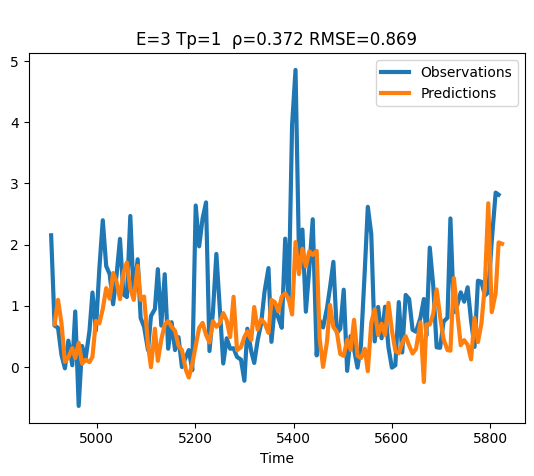

       Time  Observations  Predictions  Pred_Variance
0    4907.0      2.152924          NaN            NaN
1    4914.0      0.678034     0.699700       0.432620
2    4921.0      0.641854     1.098250       0.887092
3    4928.0      0.198851     0.717571       0.289513
4    4935.0     -0.020203     0.085792       0.156985
..      ...           ...          ...            ...
127  5796.0      1.220830     2.676018       0.703188
128  5803.0      2.056685     0.897821       0.309601
129  5811.0      2.850707     1.206634       0.902741
130  5817.0      2.816007     2.037245       1.526402
131  5824.0           NaN     2.014461       1.330222

[132 rows x 4 columns]


In [7]:
result = edm.Simplex(
    dataFrame = time_series, 
    columns = 'Nitrate Phosphate Silicate Nitrite AVG_TEMP_C AVG_SAL_PSU AVG_DENS_kgm3 Avg_Chloro',
    target = 'Avg_Chloro',
    lib = '1 701',  # Library from rows 0 to 700
    pred = '702 832',
    E = 3,
    showPlot = True
)
print(result)

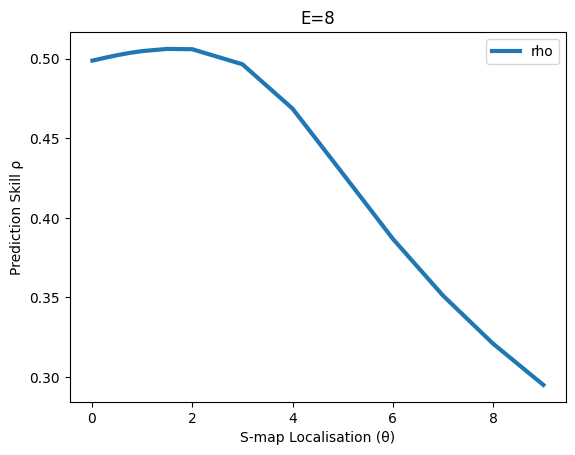

theta       rho
0    0.01  0.498862
1    0.10  0.499503
2    0.30  0.500913
3    0.50  0.502233
4    0.75  0.503676
5    1.00  0.504831
6    1.50  0.506197
7    2.00  0.505999
8    3.00  0.496544
9    4.00  0.468646
10   5.00  0.427846
11   6.00  0.386762
12   7.00  0.351089
13   8.00  0.320811
14   9.00  0.294939

In [8]:
edm.PredictNonlinear( dataFrame = time_series, lib = '1 701', pred = '702 832',
                  columns = 'Nitrate Phosphate Silicate Nitrite AVG_TEMP_C AVG_SAL_PSU AVG_DENS_kgm3 Avg_Chloro', target = 'Avg_Chloro', E = 3, embedded=True )

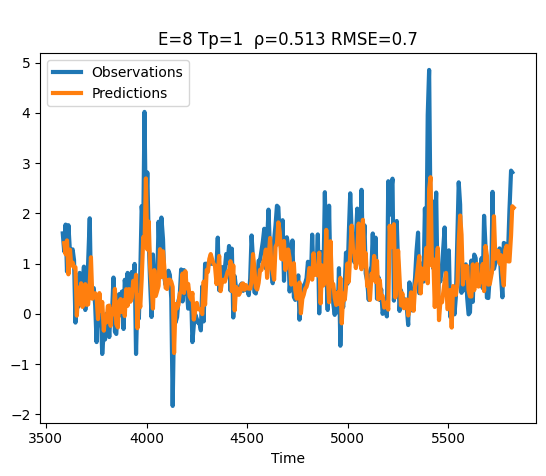

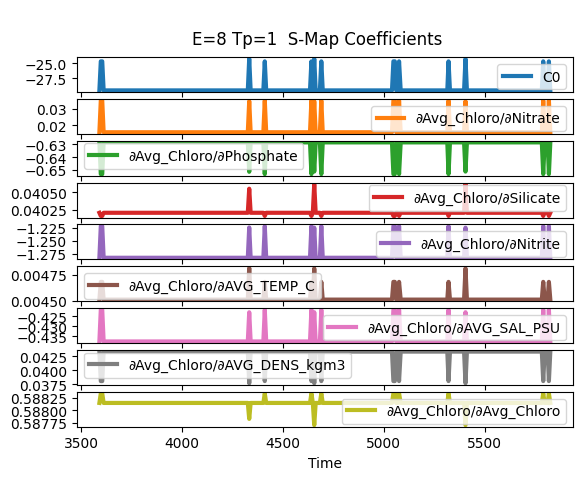

{'predictions':        Time  Observations  Predictions  Pred_Variance
0    3584.0      1.601406          NaN            NaN
1    3591.0      1.244155     1.408629       1.241417
2    3598.0      1.776646     1.188043       0.910123
3    3605.0      0.841567     1.461752       1.334758
4    3612.0      1.764731     0.786859       0.556763
..      ...           ...          ...            ...
316  5796.0      1.220830     1.044759       0.746904
317  5803.0      2.056685     1.042892       0.745049
318  5811.0      2.850707     1.564441       1.534144
319  5817.0      2.816007     2.141544       3.037576
320  5824.0           NaN     2.112593       2.949847

[321 rows x 4 columns], 'coefficients':        Time         C0  ∂Avg_Chloro/∂Nitrate  ∂Avg_Chloro/∂Phosphate  \
0    3584.0        NaN                   NaN                     NaN   
1    3591.0 -29.499563              0.015808               -0.628516   
2    3598.0 -24.686925              0.035049               -0.653120   
3    36

Time             5698.000000
Nitrate             0.780000
Phosphate           0.290000
Silicate            2.400000
Nitrite             0.000000
AVG_TEMP_C         15.650000
AVG_SAL_PSU        33.015000
AVG_DENS_kgm3    1024.204592
Avg_Chloro          0.314811
Name: 5698.0, dtype: float64

In [9]:
#Using embeddings 
#multiview embedding hao ye and sugihara (around 2015)
#t
'''
result = edm.SMap(
    dataFrame = embedded, 
    columns = 'Nitrate(t-0) Phosphate(t-0) Silicate(t-0) Nitrite(t-0) AVG_TEMP_C(t-0) AVG_SAL_PSU(t-0) AVG_DENS_kgm3(t-0) Avg_Chloro(t-0)',
    target = 'Avg_Chloro(t-0)',
    lib = '1 701',  # Library from rows 0 to 700
    pred = '702 832',
    E = 8,
    theta=2,
    showPlot = True,
    embedded=True,
    ignoreNan = True
)
print(result)
time_series.iloc[814]
'''


result = edm.SMap(
    dataFrame = time_series, 
    columns = 'Nitrate Phosphate Silicate Nitrite AVG_TEMP_C AVG_SAL_PSU AVG_DENS_kgm3 Avg_Chloro',
    target = 'Avg_Chloro',
    lib = '1 512',  # Library from rows 0 to 700
    pred = '513 832',
    E = 8,
    theta=0,
    tau = -3,
    showPlot = True,
    embedded=True,
    ignoreNan = True
)
print(result)
time_series.iloc[814]

In [10]:
result['predictions']


Time  Observations  Predictions  Pred_Variance
0    3584.0      1.601406          NaN            NaN
1    3591.0      1.244155     1.408629       1.241417
2    3598.0      1.776646     1.188043       0.910123
3    3605.0      0.841567     1.461752       1.334758
4    3612.0      1.764731     0.786859       0.556763
..      ...           ...          ...            ...
316  5796.0      1.220830     1.044759       0.746904
317  5803.0      2.056685     1.042892       0.745049
318  5811.0      2.850707     1.564441       1.534144
319  5817.0      2.816007     2.141544       3.037576
320  5824.0           NaN     2.112593       2.949847

[321 rows x 4 columns]

In [11]:
bloom_binary_prediction(result['predictions']['Observations'].iloc[1:-1],result['predictions']['Predictions'].iloc[1:-1])


[0.9184952978056427, 0.1875, 0.0429042904290429, 0.9570957095709571, 0.8125]

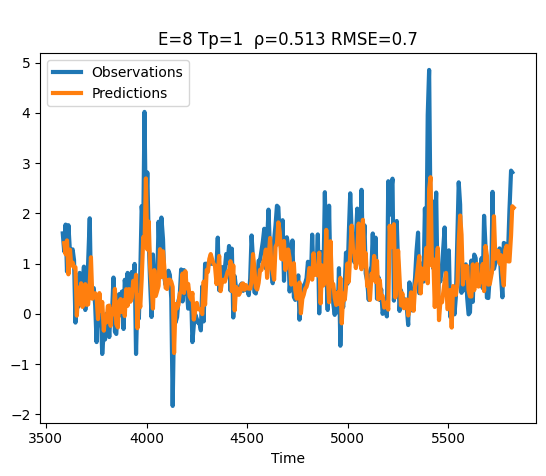

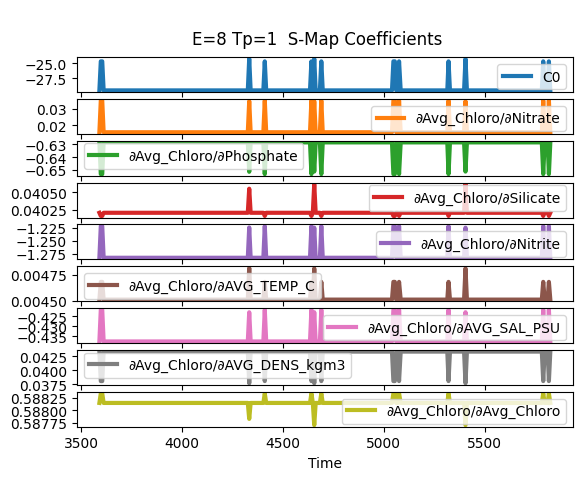

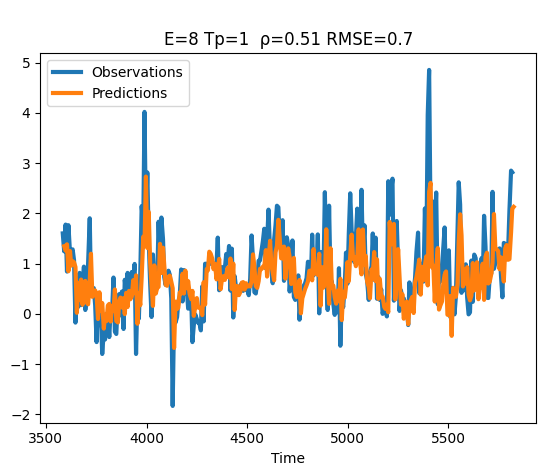

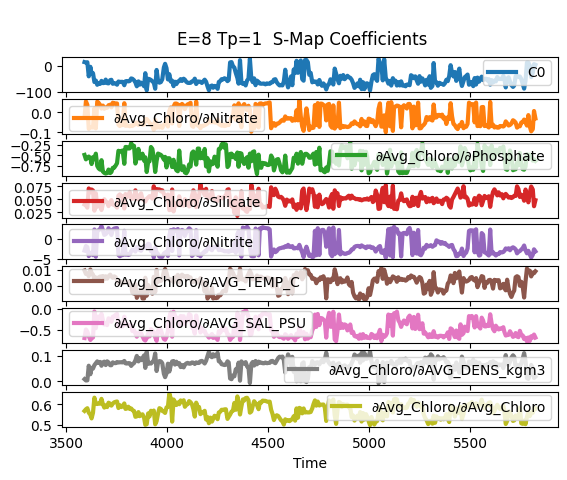

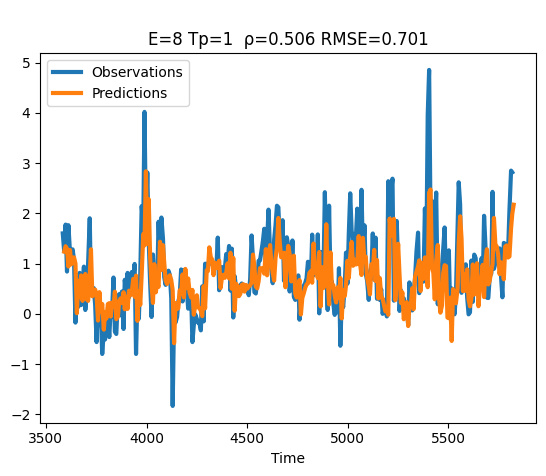

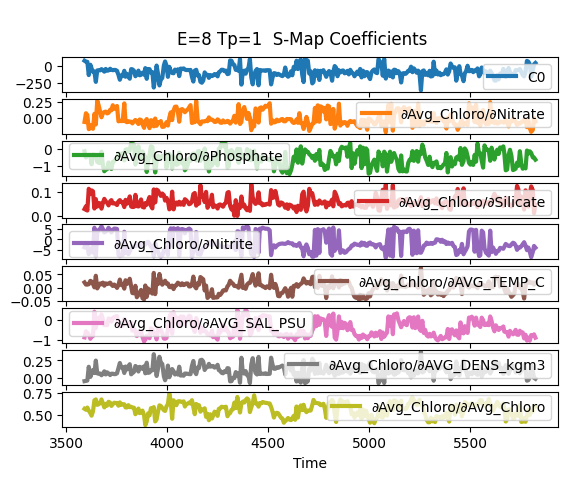

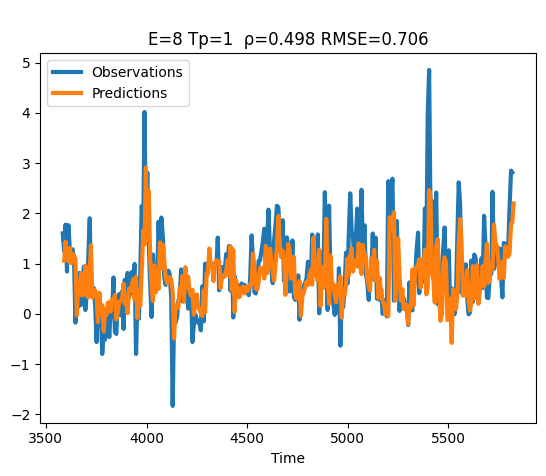

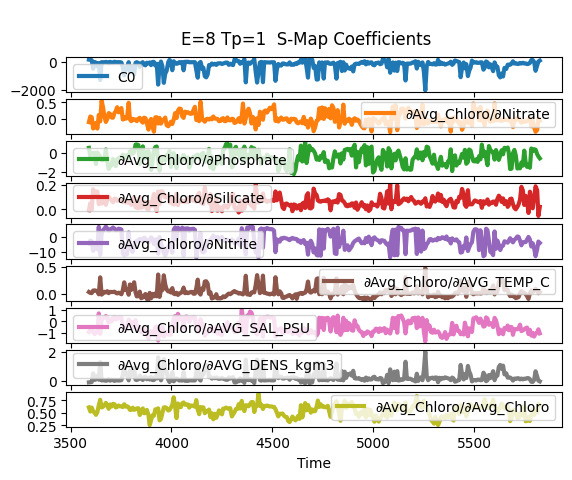

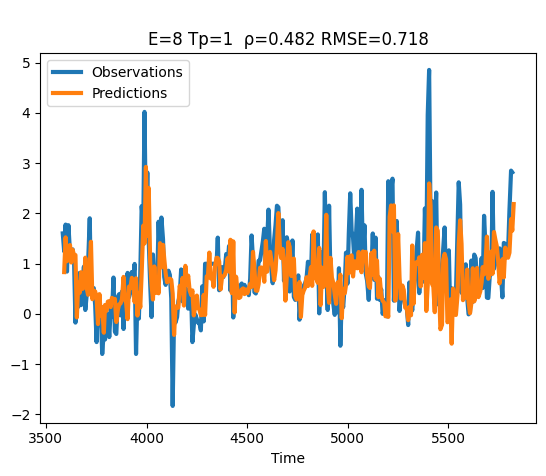

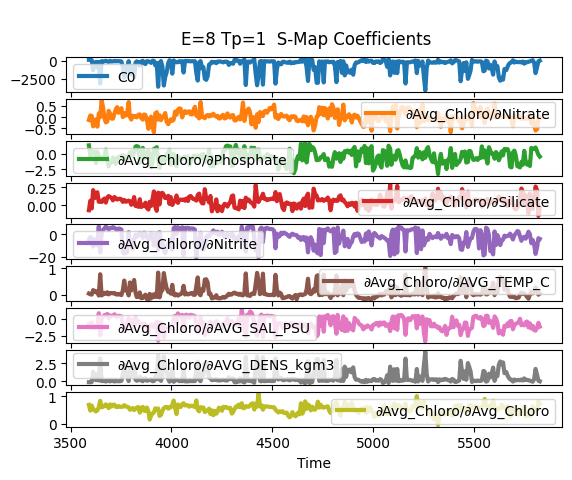

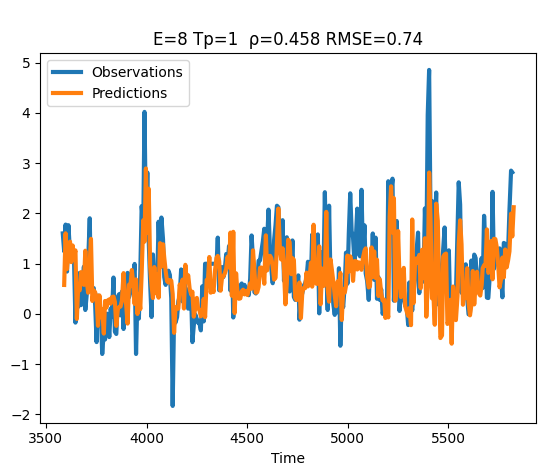

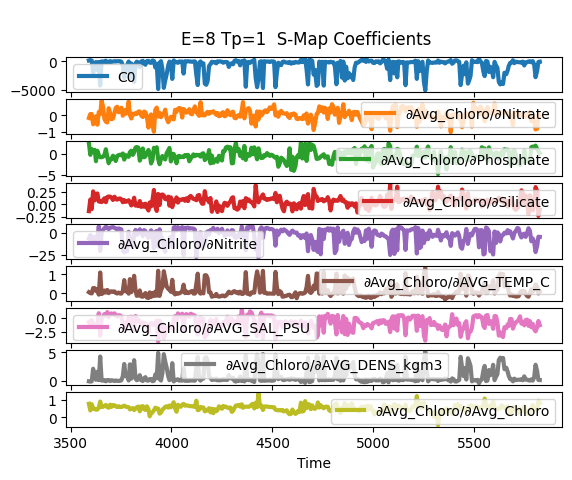

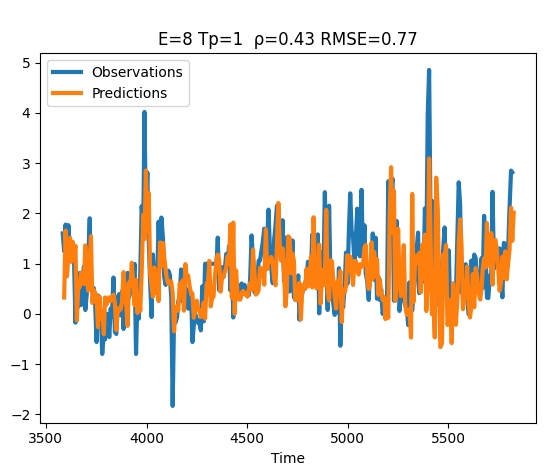

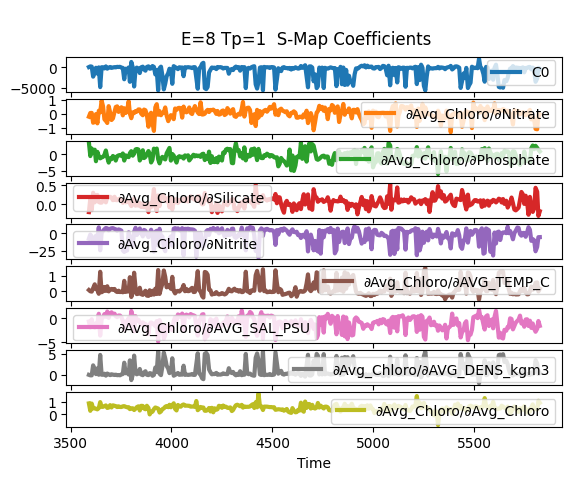

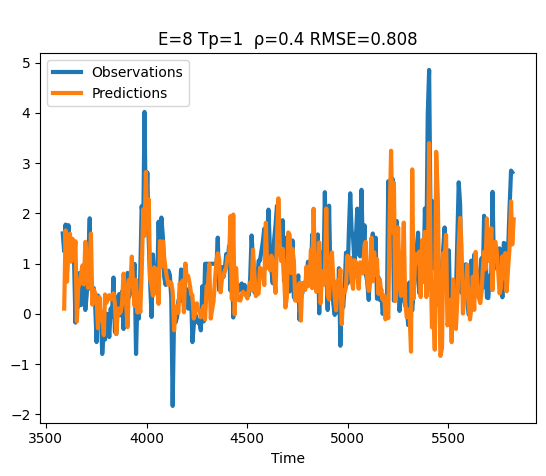

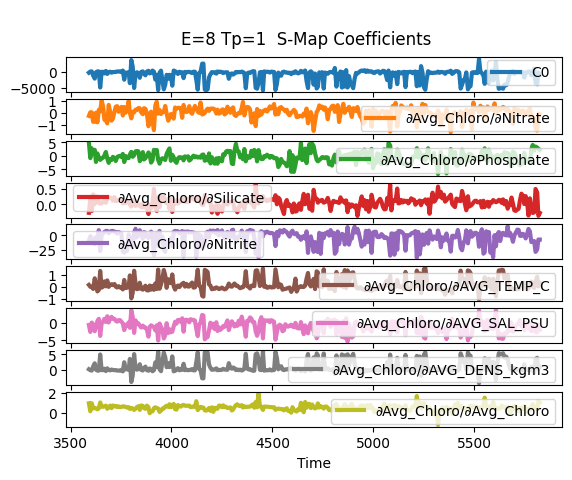

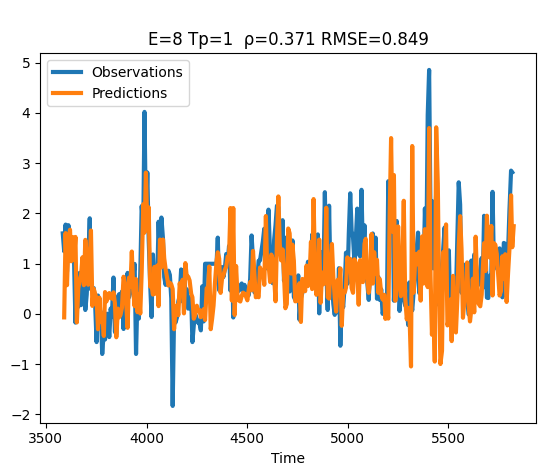

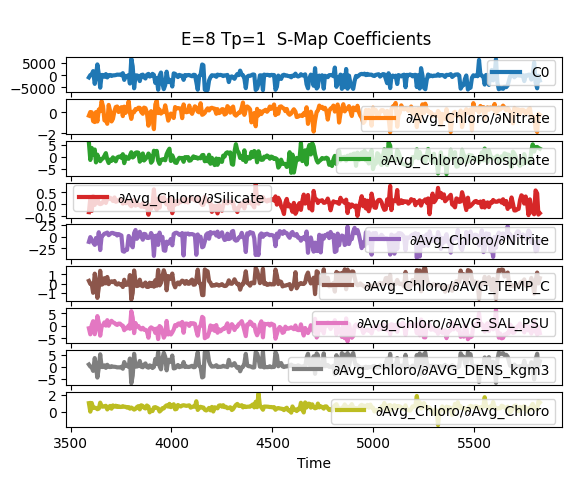

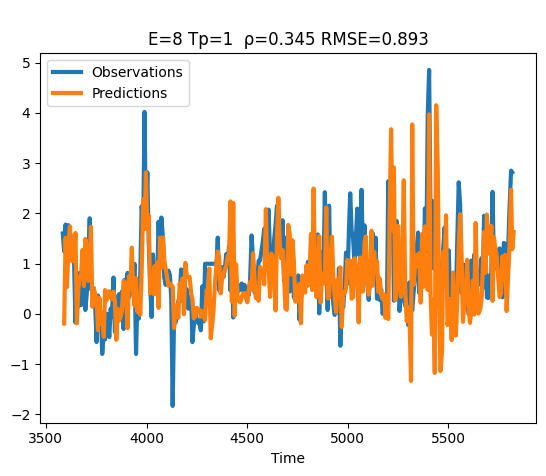

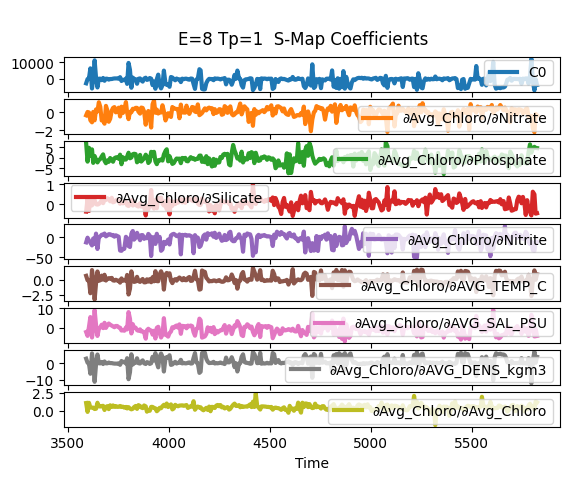

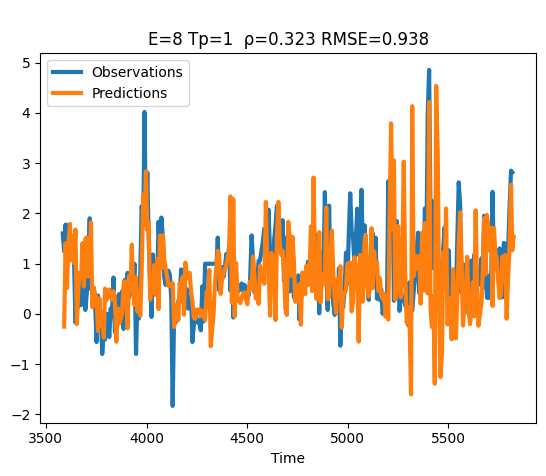

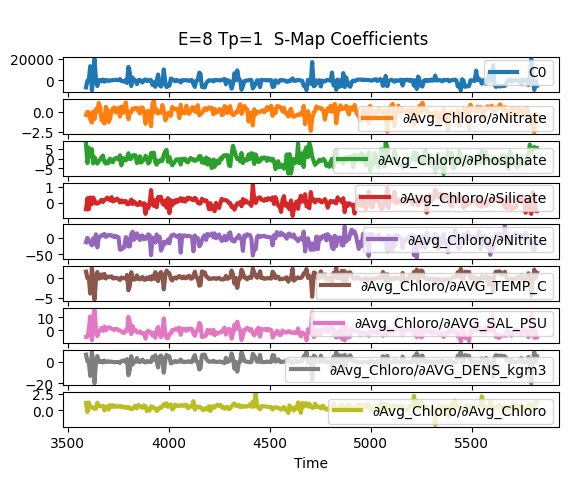

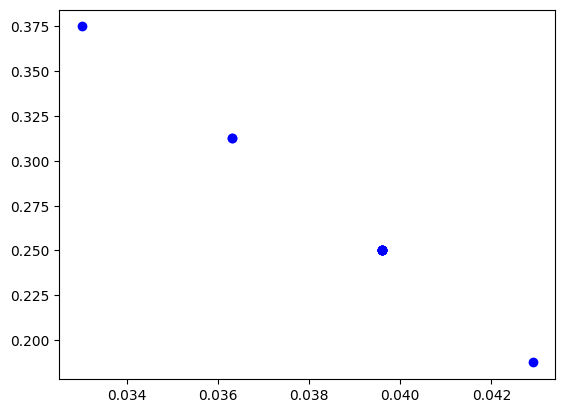

In [12]:
#Larger trial with different embeddings 
x = []
y = []
for i in range(0,11):
    result = edm.SMap(
    dataFrame = time_series, 
    columns = 'Nitrate Phosphate Silicate Nitrite AVG_TEMP_C AVG_SAL_PSU AVG_DENS_kgm3 Avg_Chloro',
    target = 'Avg_Chloro',
    lib = '1 512',  # Library from rows 0 to 700
    pred = '513 832',
    E = 8,
    tau=-1,
    theta=i,
    showPlot = True,
    embedded=True,
    ignoreNan = True
    )   
    cur_bloom = bloom_binary_prediction(result['predictions']['Observations'].iloc[1:-1],result['predictions']['Predictions'].iloc[1:-1])
    x.append(cur_bloom[2]) #False positive
    y.append(cur_bloom[1]) #True positive

plt.scatter(x, y, color='blue', label='Data Points')

In [13]:
result['predictions']['Observations'].iloc[1:]

1      1.244155
2      1.776646
3      0.841567
4      1.764731
5      1.214913
         ...   
316    1.220830
317    2.056685
318    2.850707
319    2.816007
320         NaN
Name: Observations, Length: 320, dtype: float64

In [14]:
time_series

Time  Nitrate  Phosphate  Silicate  Nitrite  AVG_TEMP_C  \
time (UTC)                                                            
0.0            0     0.43       0.24       5.6     0.03       18.10   
7.0            7     0.83       0.37       5.1     0.04       17.35   
13.0          13     0.45       0.24       3.5     0.00       20.25   
20.0          20     0.34       0.17       4.2     0.00        9.90   
28.0          28     0.29       0.12       3.8     0.00       11.25   
...          ...      ...        ...       ...      ...         ...   
5789.0      5789     0.85       0.30       6.2     0.00       17.40   
5796.0      5796     0.45       0.25       4.9     0.00       17.90   
5803.0      5803     0.00       0.17       5.2     0.00       17.35   
5811.0      5811     0.00       0.20       9.4     0.00       17.70   
5817.0      5817     0.00       0.10       7.5     0.00       17.80   

            AVG_SAL_PSU  AVG_DENS_kgm3  Avg_Chloro  
time (UTC)                                          
0.0              33.695    1024.129374    0.598837  
7.0              33.640    1024.289049    0.996949  
13.0             33.660    1023.563298   -0.010050  
20.0             33.650    1023.740812    0.207014  
28.0             33.710    1023.004896    0.879627  
...                 ...            ...         ...  
5789.0           33.470    1024.149572    1.169381  
5796.0           33.475    1024.033476    1.220830  
5803.0           33.545    1024.214172    2.056685  
5811.0           33.625    1024.194573    2.850707  
5817.0           33.625    1024.169303    2.816007  

[832 rows x 9 columns]

In [15]:
y

[0.1875, 0.25, 0.3125, 0.3125, 0.375, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]

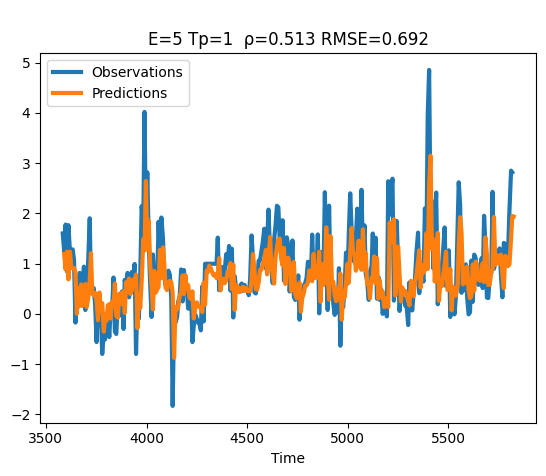

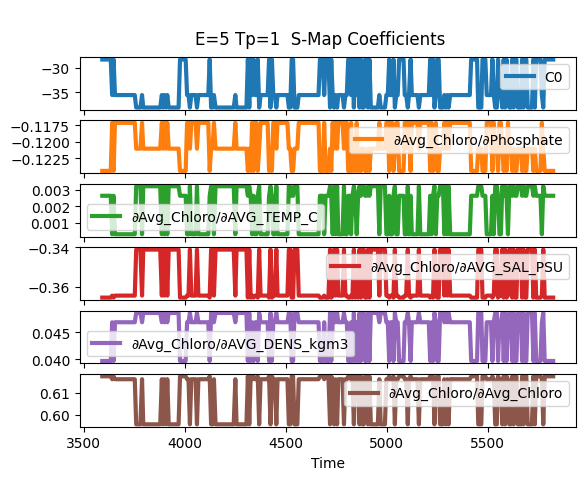

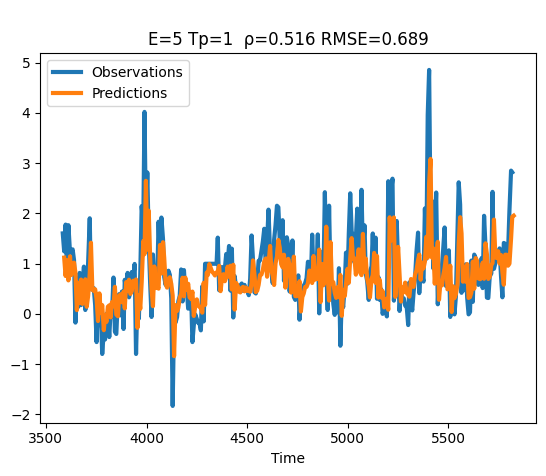

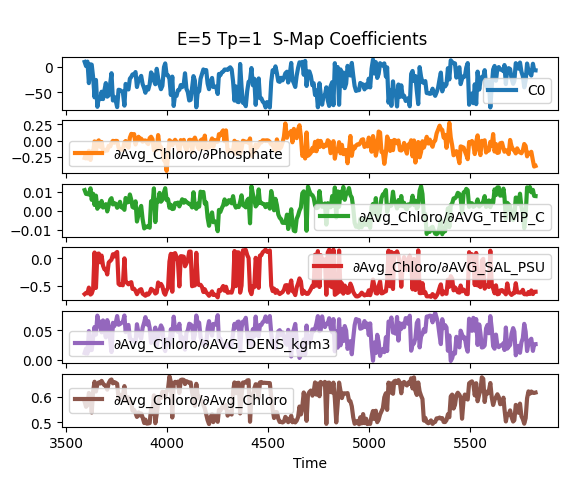

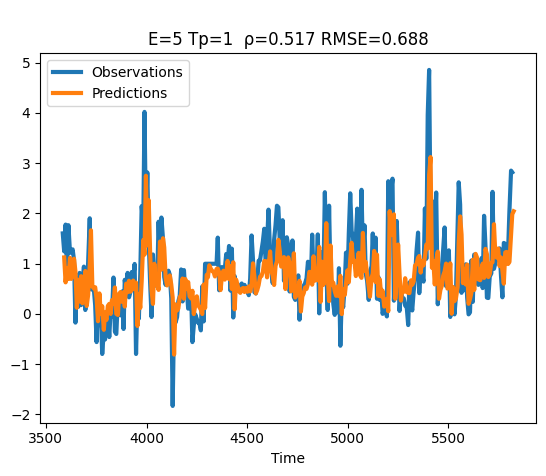

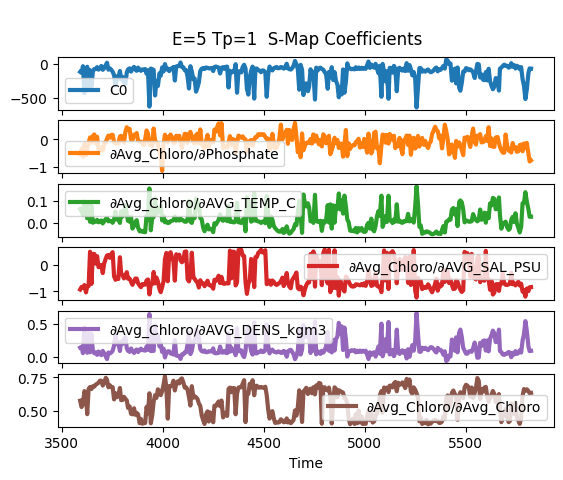

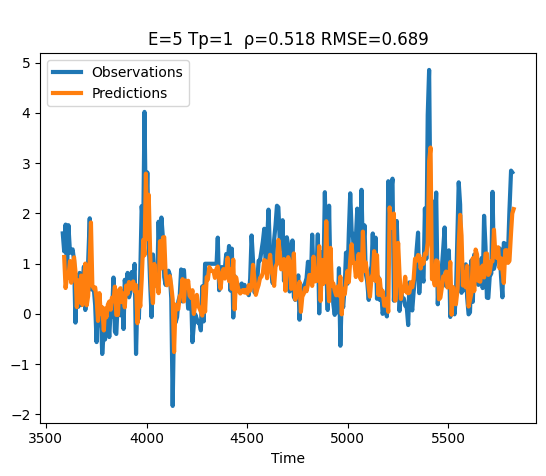

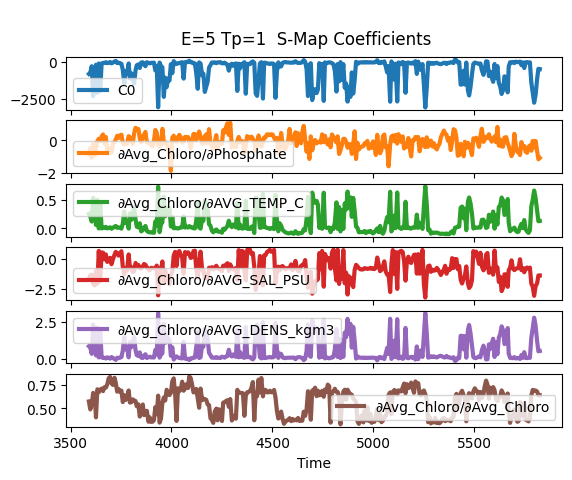

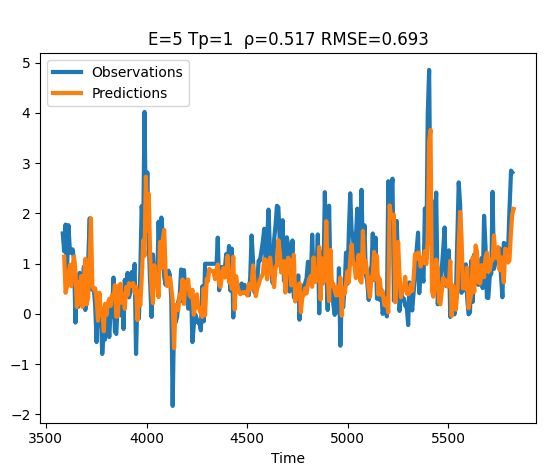

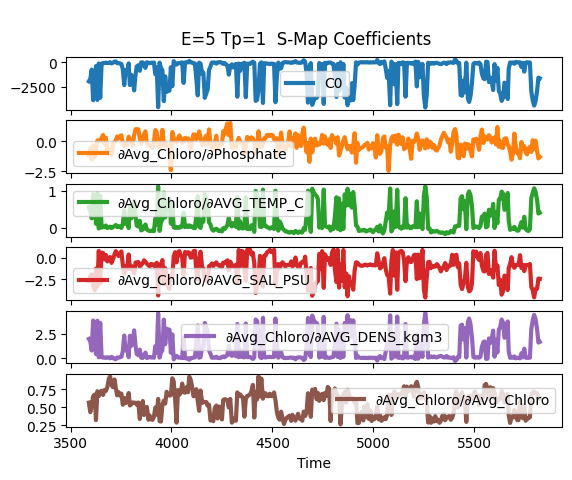

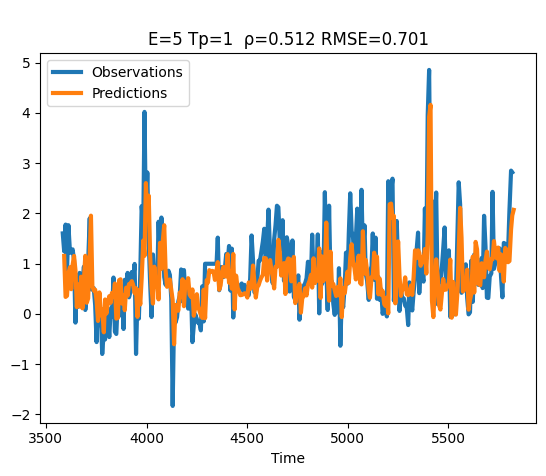

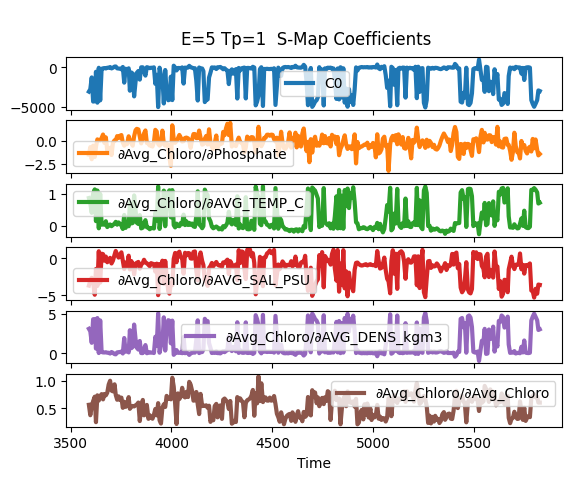

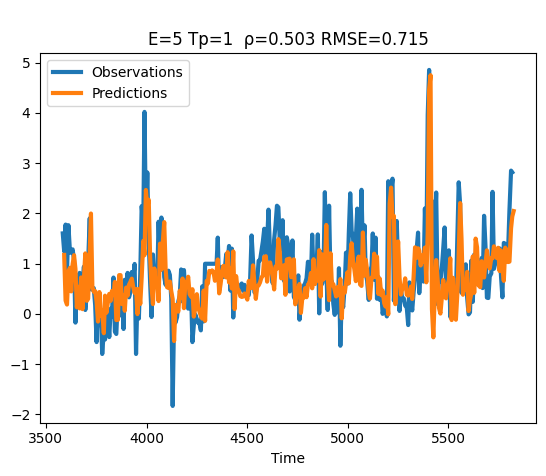

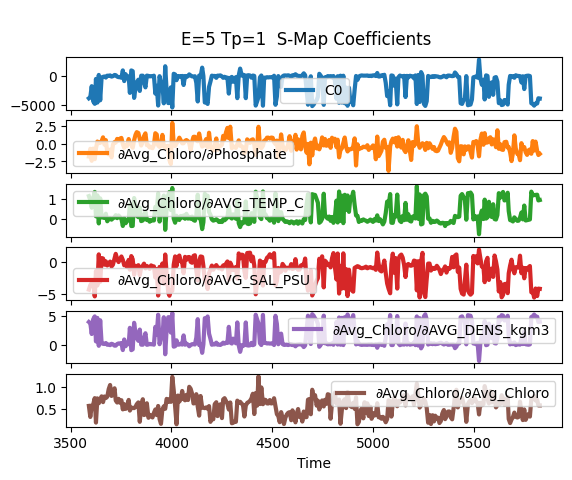

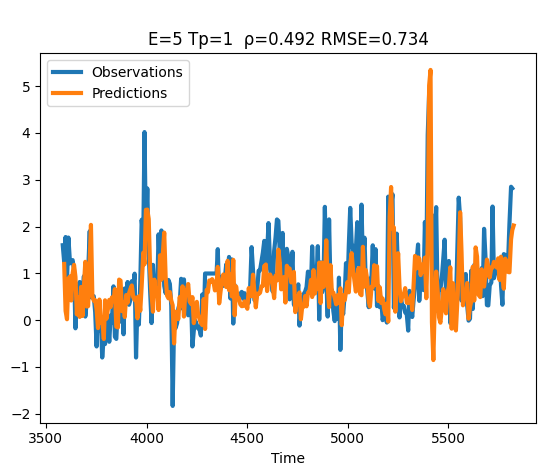

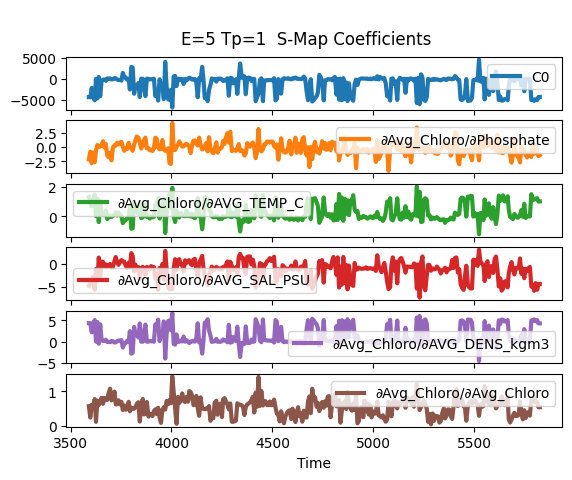

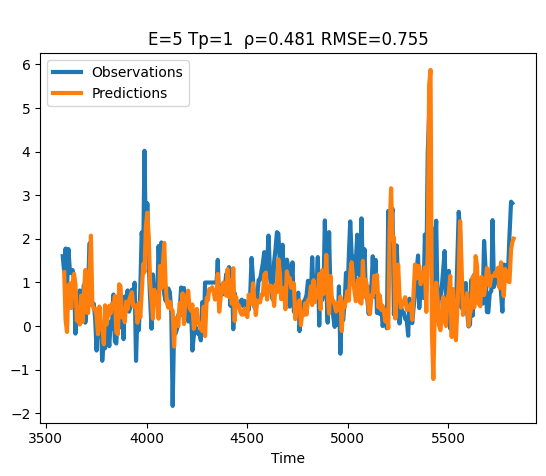

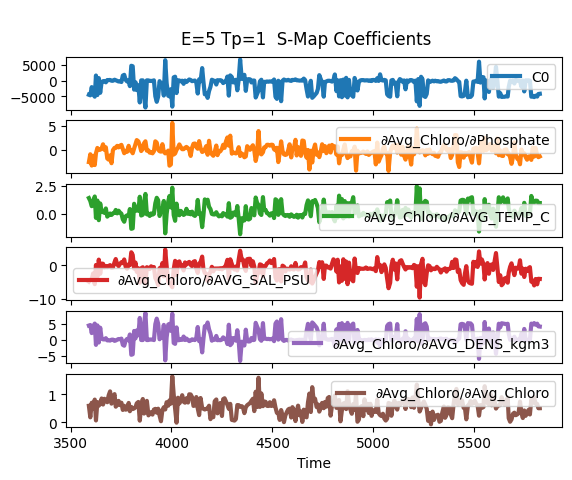

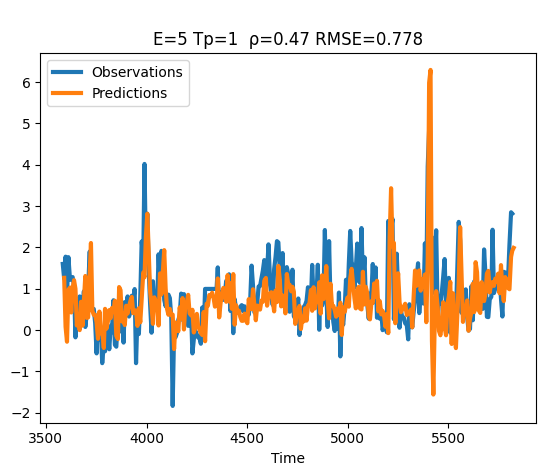

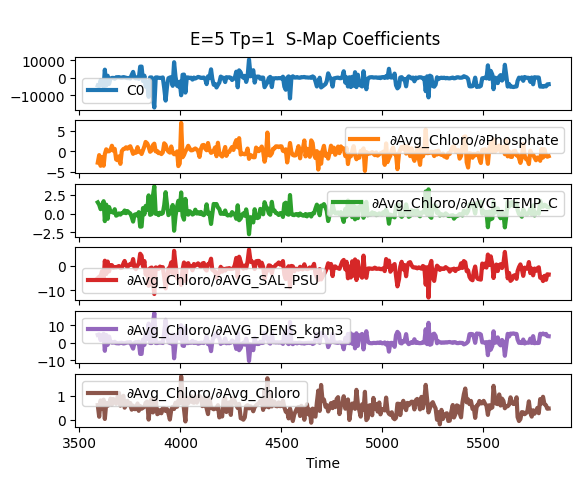

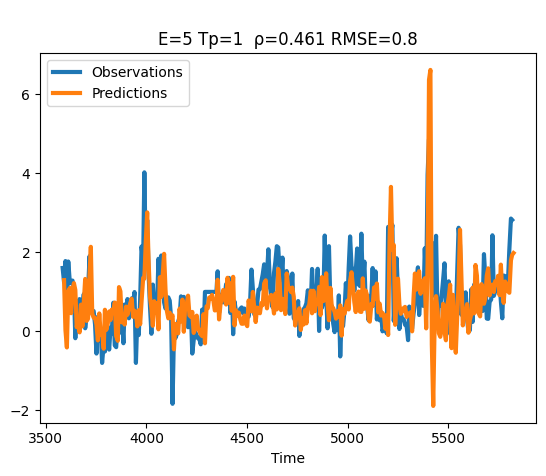

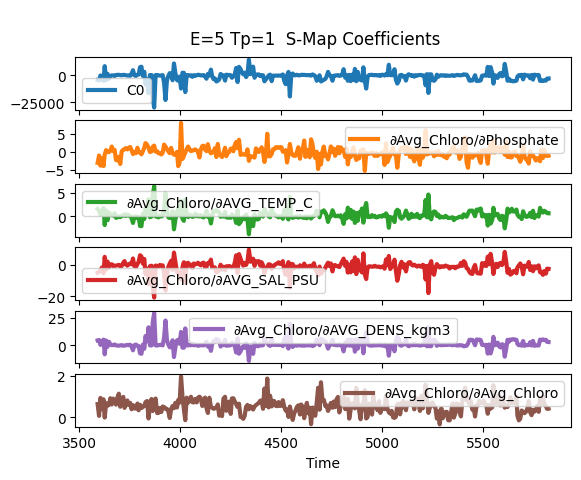

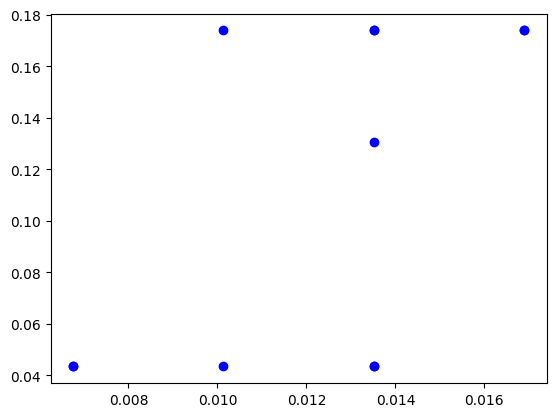

In [16]:
#Larger trial with different embeddings 
x = []
y = []
for i in range(0,11):
    result = edm.SMap(
    dataFrame = time_series, 
    columns = 'Phosphate AVG_TEMP_C AVG_SAL_PSU AVG_DENS_kgm3 Avg_Chloro',
    target = 'Avg_Chloro',
    lib = '1 512',  # Library from rows 0 to 700
    pred = '513 832',
    E = 8,
    tau=-1,
    theta=i,
    showPlot = True,
    embedded=True,
    ignoreNan = True
    )   
    cur_bloom = thresh_bloom_binary_prediction(result['predictions']['Observations'].iloc[1:-1],result['predictions']['Predictions'].iloc[1:-1],threshold=np.log(8.03199999999999))
    x.append(cur_bloom[2]) #False positive
    y.append(cur_bloom[1]) #True positive

plt.scatter(x, y, color='blue', label='Data Points')